In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

In [2]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.shape

(284807, 31)

In [3]:
df.head(n=10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<AxesSubplot:ylabel='Class'>

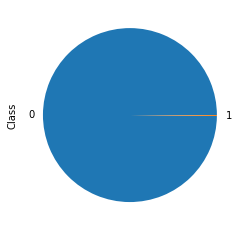

In [5]:
df['Class'].value_counts().plot(kind='pie')

### Checking for Duplicate Entries 

In [6]:
df.duplicated().sum()

1081

In [7]:
df.drop_duplicates(keep=False,inplace=True)

### Data is highly imbalanced .We will correct it by oversamplying .After correcting we will check the skewness of the data 

In [8]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

print(x.shape,y.shape)

(282953, 30) (282953,)


In [9]:
smote=SMOTE()
x,y=smote.fit_resample(x,y)

In [10]:
print(x.shape,y.shape)

(564986, 30) (564986,)


AxesSubplot(0.260833,0.125;0.503333x0.755)


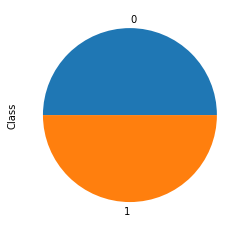

In [11]:
print(y.value_counts().plot(kind='pie'))

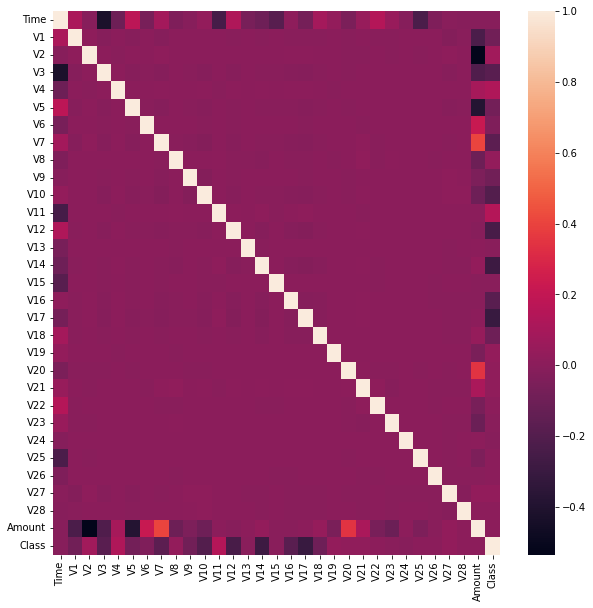

In [12]:
plt.figure(figsize=(10,10))
dataplot=sns.heatmap(df.corr())
plt.show()

### This saves us from Multi co-linearity

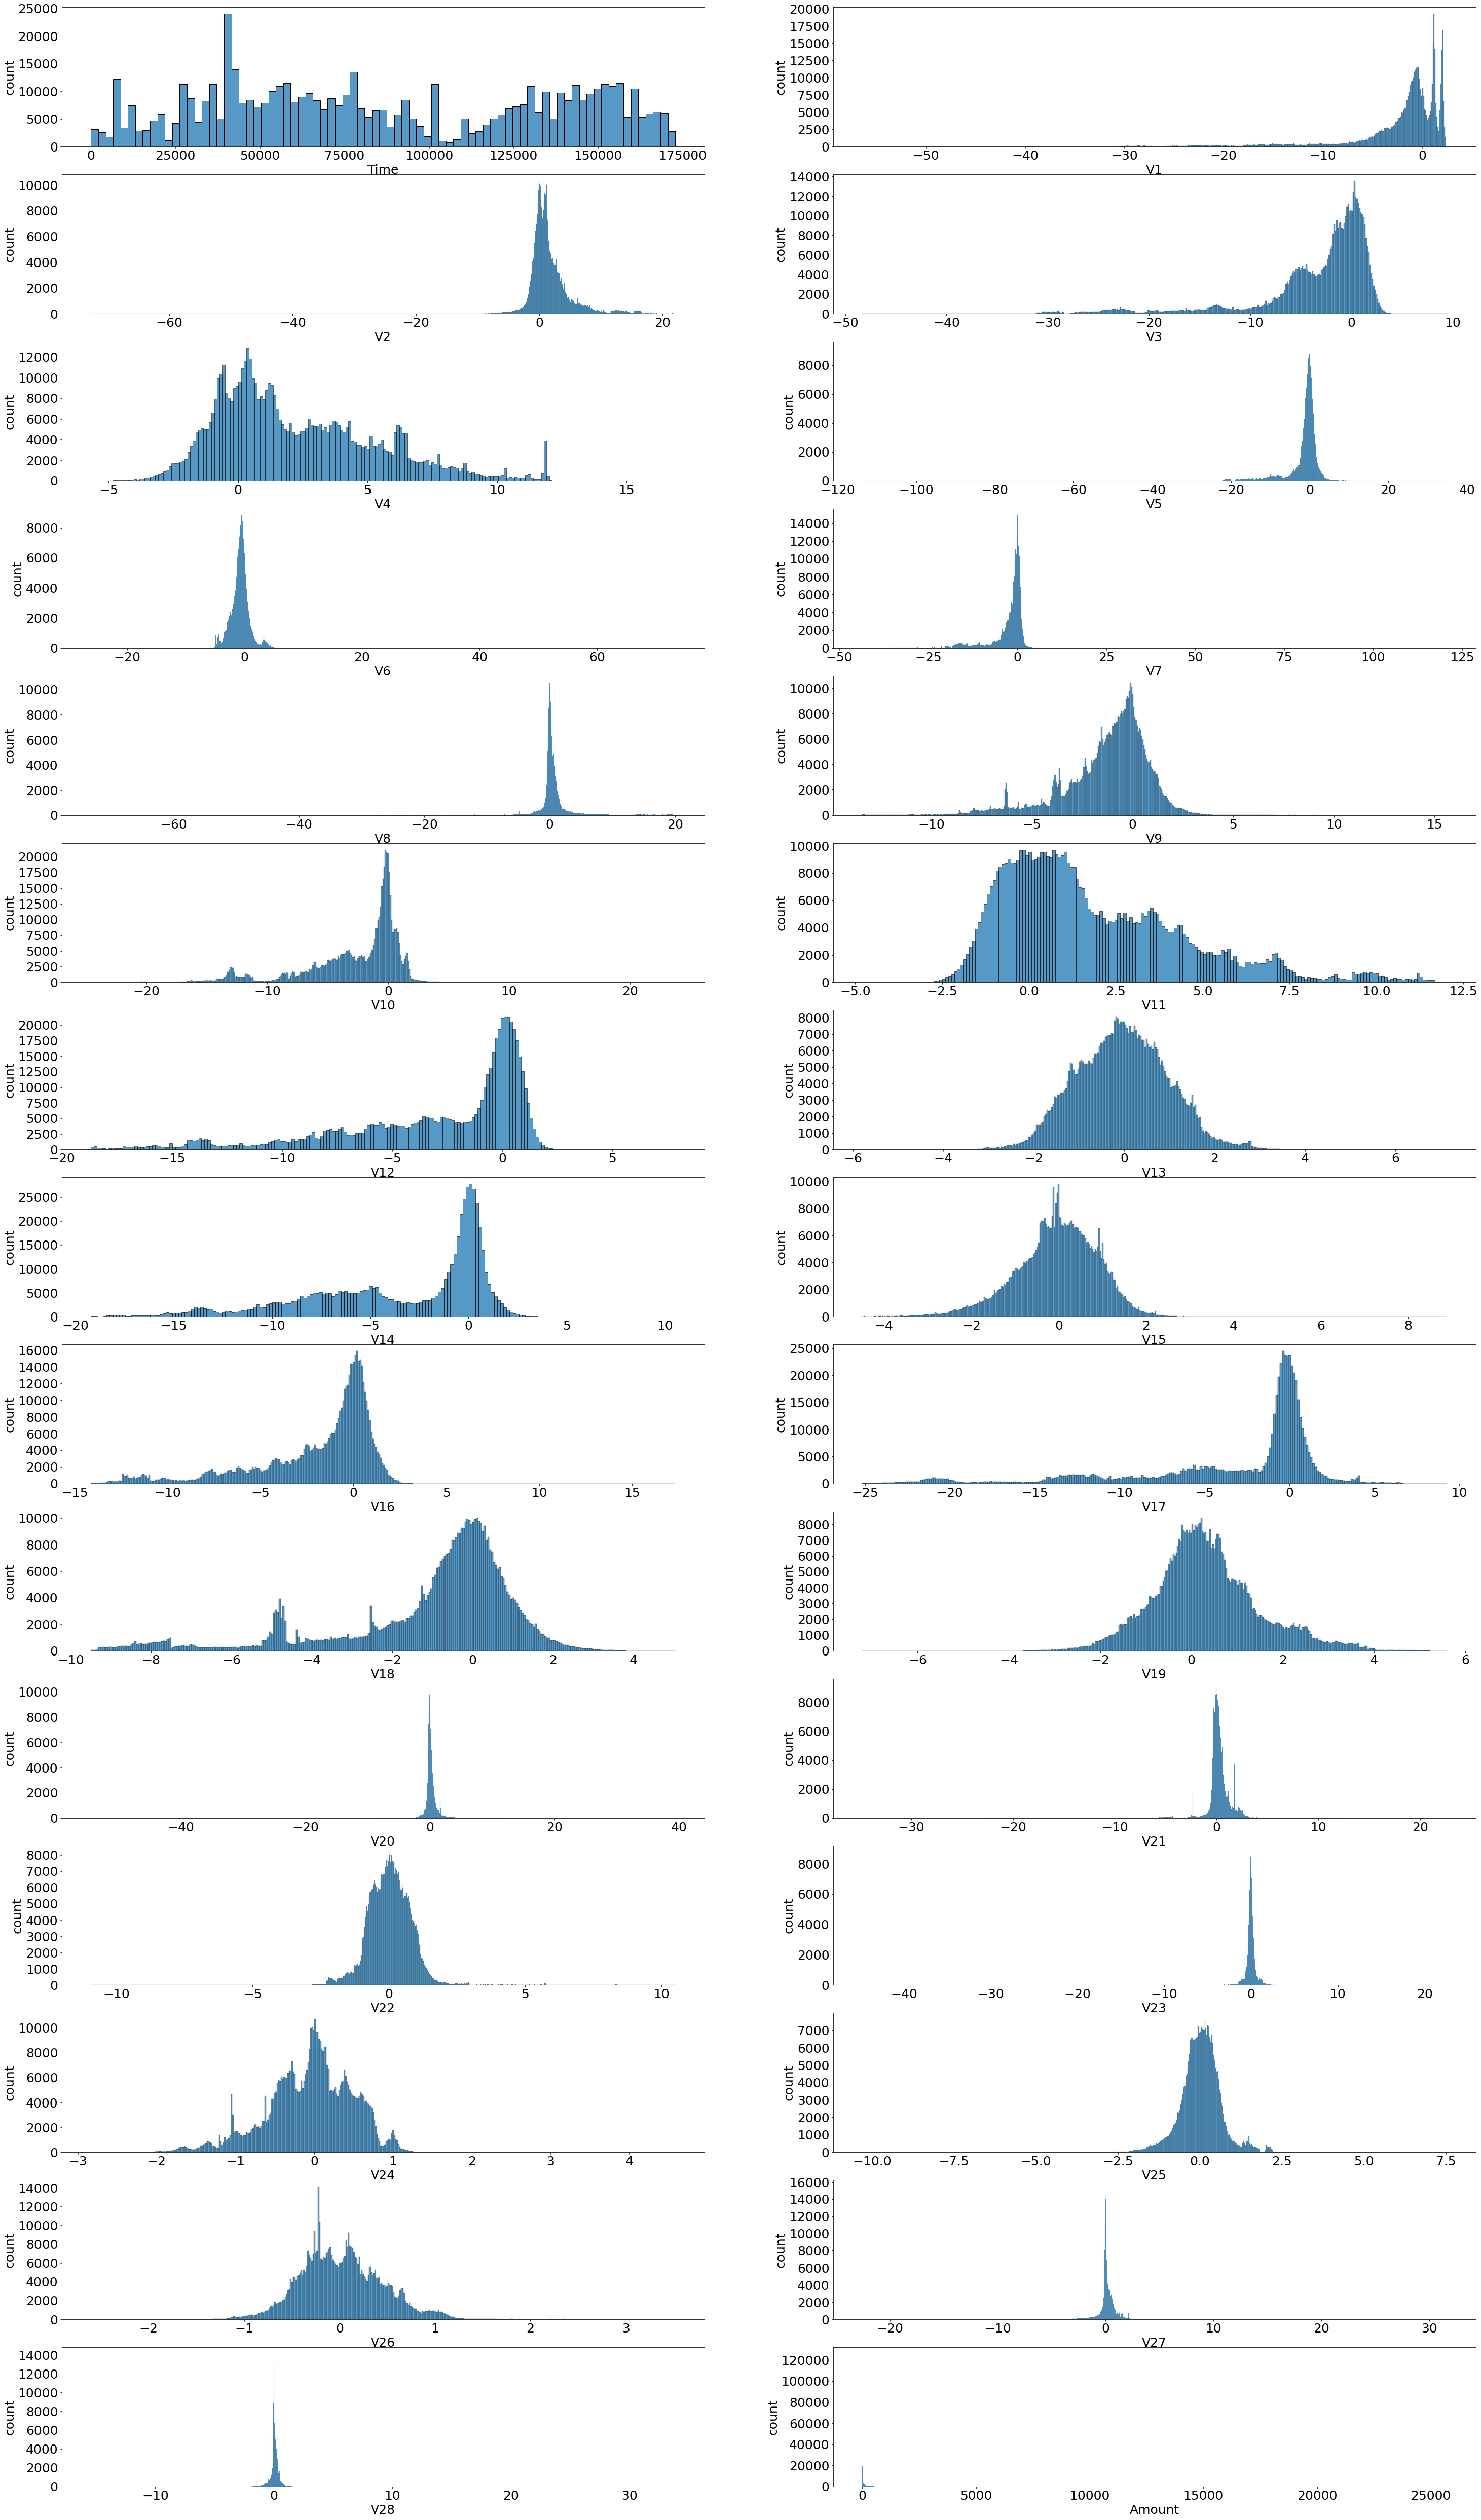

In [13]:
plt.figure(figsize=(50,90))
i=1
for col in x.columns:
    plt.subplot(15,2,i)
    sns.histplot(x[col])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    i+=1
plt.show()
    
    

In [14]:
def check_skewness(x):
    skew_limit=0.75
    skew_value=df[x.columns].skew()
    #print(skew_value)
    skew_col=skew_value[abs(skew_value)>skew_limit]
    cols=skew_col.index
    return cols

In [15]:
skewed_col=check_skewness(x)
print(skewed_col)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object')


In [16]:
pt=PowerTransformer(standardize=False)
x[skewed_col]=pt.fit_transform(x[skewed_col])

### Checking for the Duplicate Entries after SMOTE just to be sure 

In [17]:
x.duplicated().sum()

0

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(451988, 30)
(451988,)
(112998, 30)
(112998,)


In [19]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [20]:
def model_evaluate(model):
    model.fit(xtrain,ytrain)
    acc=model.score(xtest,ytest)
    
    print("Model Name",model)
    print("Acuuracy",acc)

In [21]:
lr=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier(max_depth=6)
rf=RandomForestClassifier(max_samples=0.9)
knn=KNeighborsClassifier(n_neighbors=5)

models=[lr,dt,rf,knn]

for model in models:
    model_evaluate(model)

Model Name LogisticRegression()
Acuuracy 0.9795660100178765
Model Name DecisionTreeClassifier(max_depth=6)
Acuuracy 0.974114586098869
Model Name RandomForestClassifier(max_samples=0.9)
Acuuracy 0.9999115028584576
Model Name KNeighborsClassifier()
Acuuracy 0.9992477742968902


In [22]:
base_models=[('RF',RandomForestClassifier(max_samples=0.9)),('knn',KNeighborsClassifier(n_neighbors=5))]
meta_model = LogisticRegression()
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=True, cv=3)

In [23]:
stacking_model.fit(xtrain, ytrain)
acc=stacking_model.score(xtest,ytest)

0.9999115028584576

<AxesSubplot:>

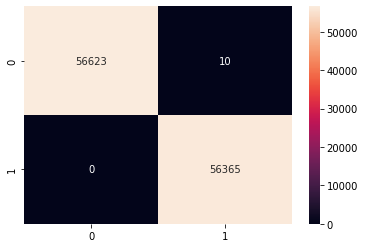

In [24]:
from sklearn.metrics import confusion_matrix
y_pred = stacking_model.predict(xtest)
conf_matrix = confusion_matrix(ytest, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt='g')

In [25]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       1.00      1.00      1.00     56365

    accuracy                           1.00    112998
   macro avg       1.00      1.00      1.00    112998
weighted avg       1.00      1.00      1.00    112998

